In [3]:
#케글
#baseline
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.DESCR) #cancer['DESCR'] 도 가능
print(cancer.data.shape, cancer.target.shape)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [50]:
cancer.target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(426, 30) (426,)
(143, 30) (143,)


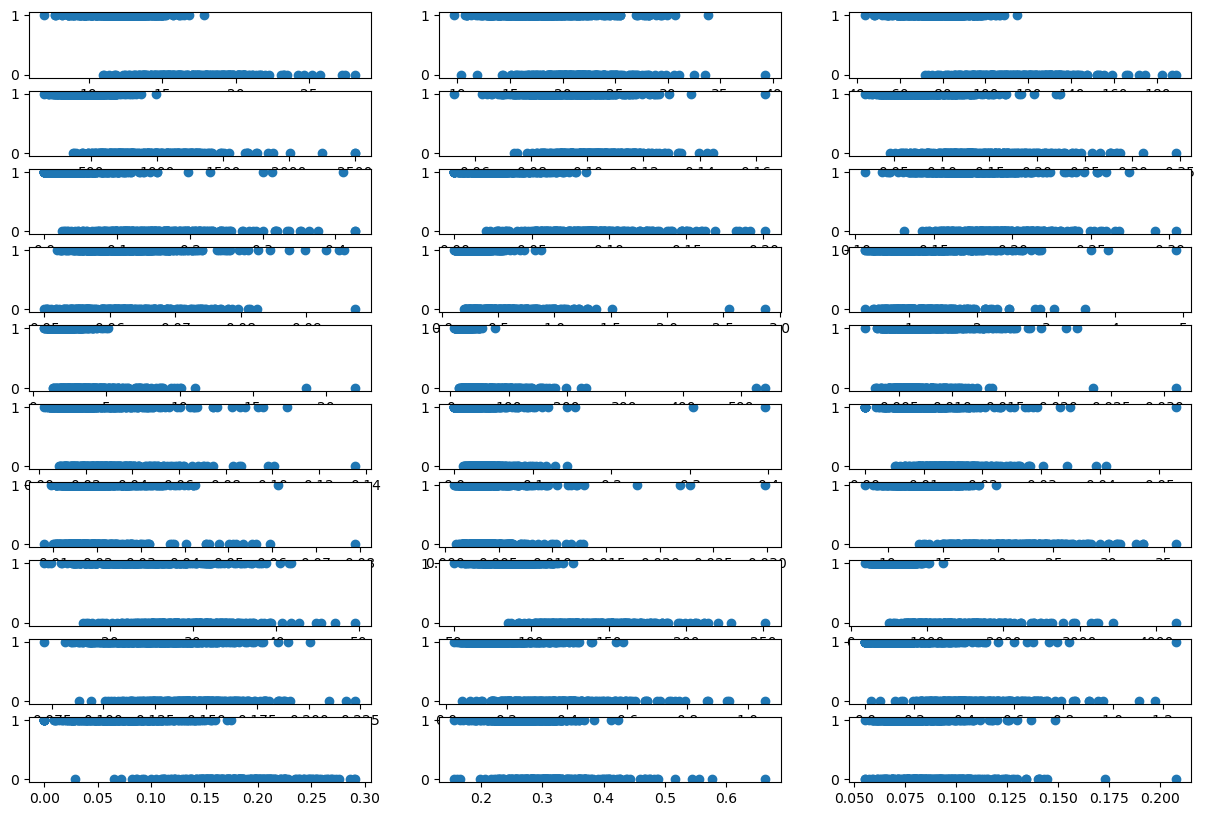

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 3, figsize=(15, 10)) #총 30개의 독립변수가 있으므로 10x3 타일을 이용
#y = iris.target
y = cancer.target.astype('str') # target data의 type을 string으로 변환

for i, ax in enumerate(axes.ravel()): #나누어진 각 subplot에 대해
    if i < cancer.data.shape[1]:
        x = cancer.data[:,i]
#        ax.set_title(cancer.feature_names[i])
        ax.scatter(x, y)
plt.show()

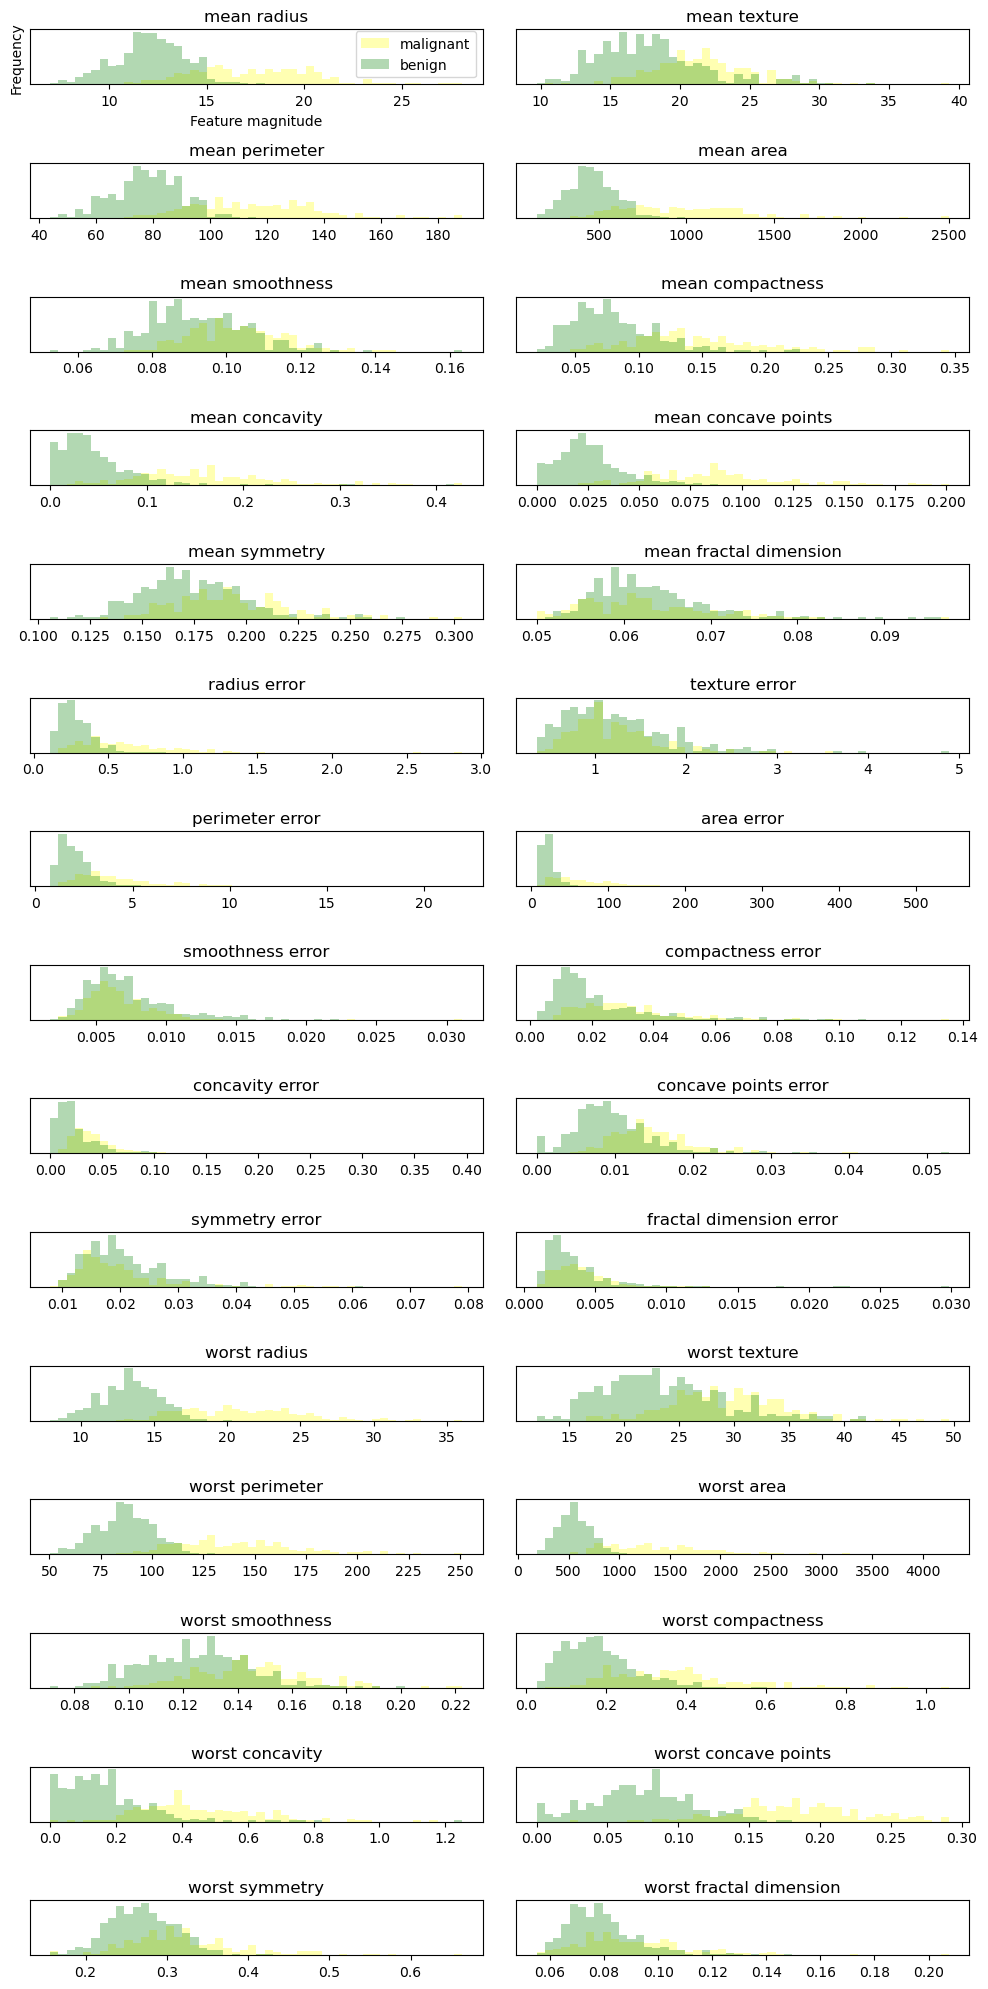

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#분포차이를 보고 싶은 거

fig, axes = plt.subplots(15, 2, figsize=(10, 20)) #총 30개의 독립변수가 있으므로 10x3 타일을 이용

malignant = cancer.data[cancer.target == 0] # malignant를 분리
benign = cancer.data[cancer.target == 1] # benign을 분리

ax = axes.ravel()
colors = ['yellow', 'green']

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=colors[0], alpha=.3)
    ax[i].hist(benign[:, i], bins=bins, color=colors[1], alpha=.3)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

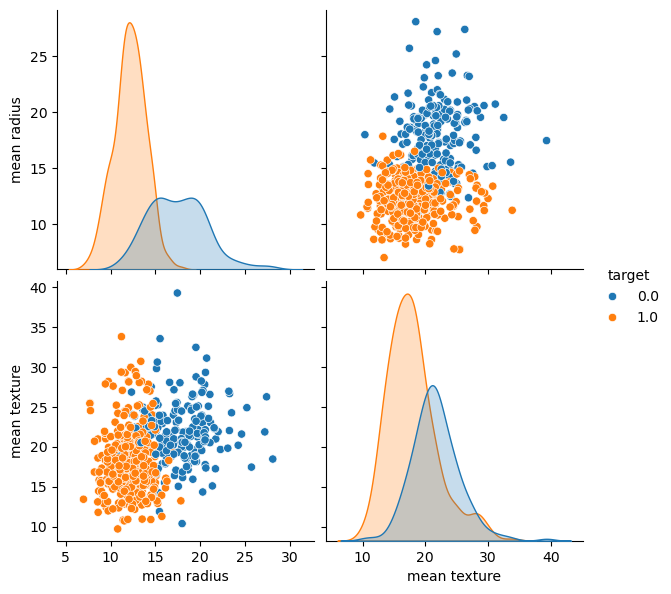

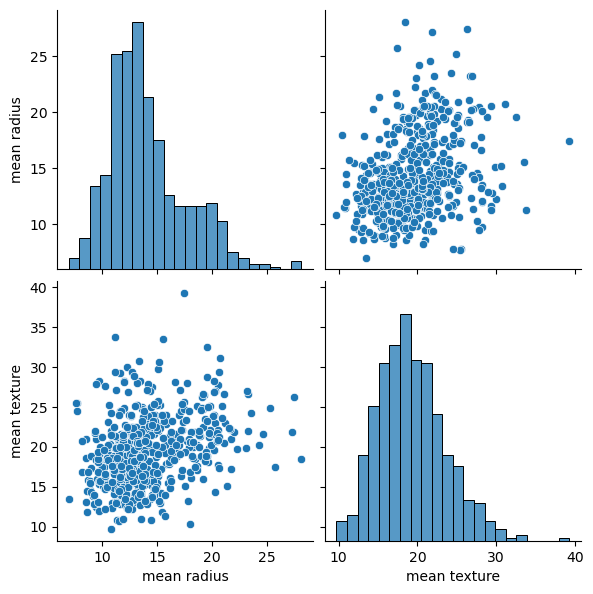

In [54]:
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd

#페어플롯

df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))

g = sns.pairplot(df, height=3, hue='target',vars=['mean radius', 'mean texture']) #hue>타겟 mean~2개>입력변수(독립변수)
g = sns.pairplot(df, height=3, vars=['mean radius', 'mean texture'])

#2사분면 자기와 자기를 비교하게 되니까 히스토그램을 그림 > hue를 주면 산점도는 색을 바꿔줌+각각의 히스토그램 그려줌
#3사분면 radius가 texture가 관계가 있나없나 hue를 주면 각각에 맞춰 색을 바꿔줌
#그림들을 한꺼번에 그리기

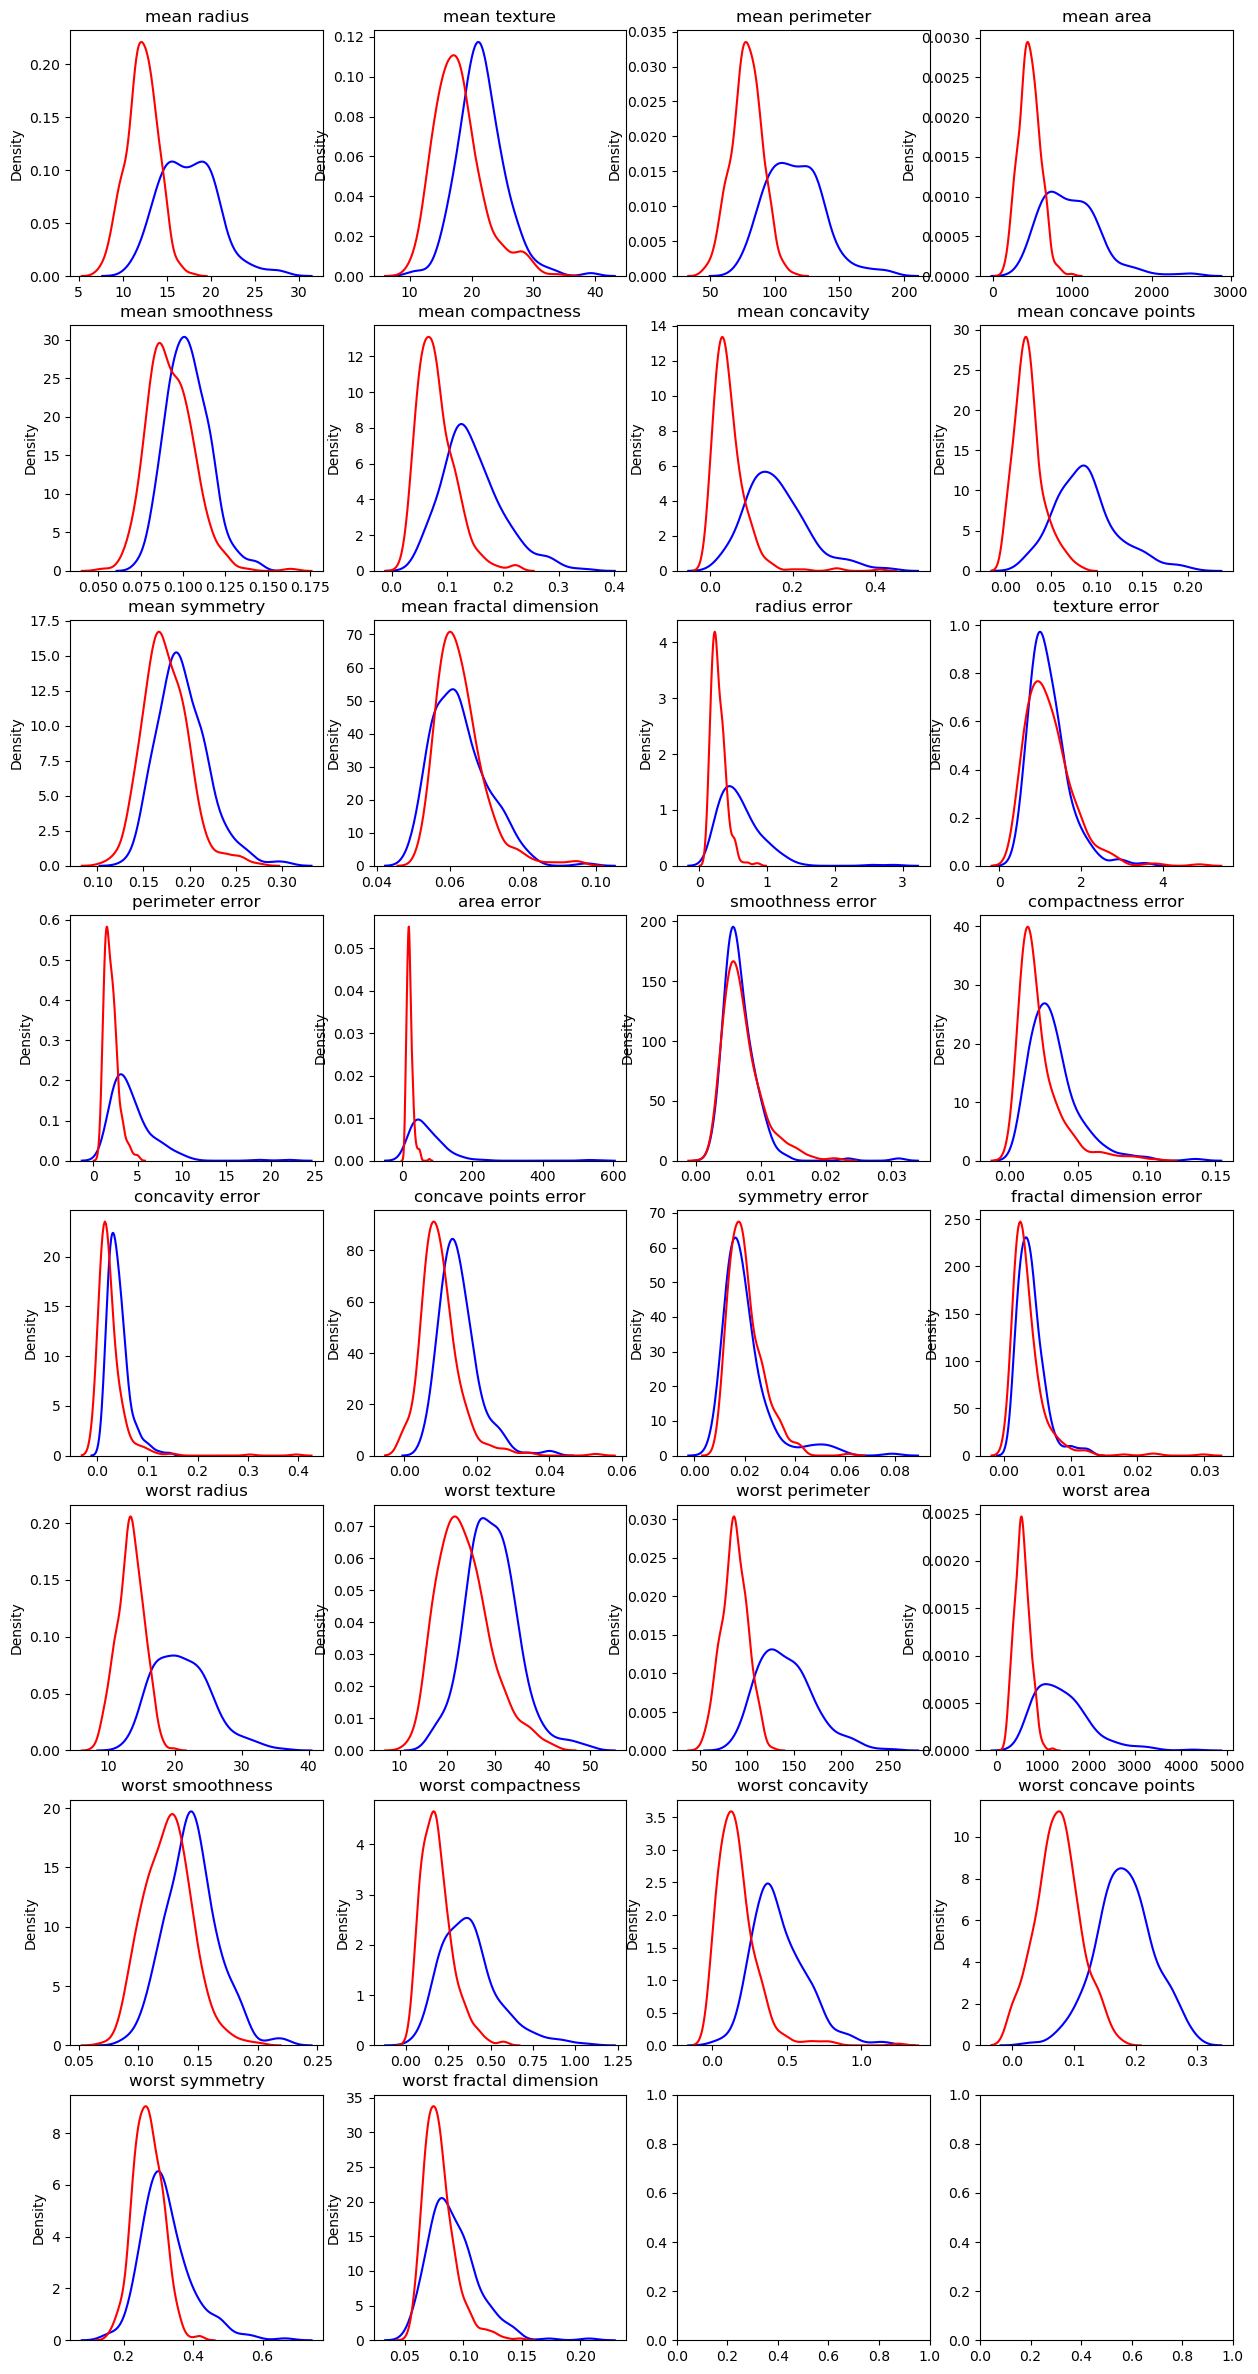

In [55]:
import seaborn as sns
fig, axes = plt.subplots(8,4, figsize = (15,30))
X = cancer.data
Y = cancer.target
for i,a in enumerate(axes.ravel()):
    if i < X.shape[1]:
        sns.kdeplot(X[Y==0,i], ax=a, color = 'blue')
        sns.kdeplot(X[Y==1,i], ax=a, color = 'red')
        a.set_title(cancer.feature_names[i])
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression

LR_clf = LogisticRegression(max_iter=10000, solver='lbfgs')
LR_clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [57]:
print('Train set score: {:.3f}'.format(LR_clf.score(X_train, y_train))) #sum(LR_clf.predict(X_test)==y_test/len(y_test)
print('Test set score: {:.3f}'.format(LR_clf.score(X_test, y_test)))

Train set score: 0.965
Test set score: 0.944


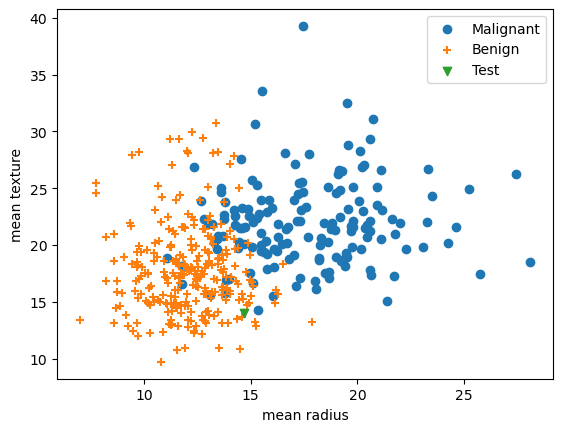

In [58]:
#k-최근접 이웃 : 단순, 이거 1개만으론 잘 안씀, 그 점이 어느 분포에 가까이 있나>k개의 가까운 점의 색을 추출
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], marker='o')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], marker='+')
plt.scatter(X_test[0, 0], X_test[0, 1], marker='v')

plt.legend(['Malignant', 'Benign', 'Test'])
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.show()

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) #n_neighbors=점의 갯수> 분류가 2개의 경우 홀수개가 좋음(둘이 같은 경우방지), 3개의 경우에는 3의 배수x
knn.fit(X_train, y_train)

print('K-neighbor train set score: {:.3f}'.format(knn.score(X_train, y_train)))
print('K-neighbor test set score: {:.3f}'.format(knn.score(X_test, y_test)))

K-neighbor train set score: 0.946
K-neighbor test set score: 0.923


In [60]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

print('K-neighbor train set score: {:.3f}'.format(knn.score(X_train, y_train)))
print('K-neighbor test set score: {:.3f}'.format(knn.score(X_test, y_test)))

#KNN 장단점 : 이해가 쉽고 별다른 노력 없이 좋은 성능을 보이는 경우가 있음
#훈련 세트가 커지면 예측이 느려지고 특성이 많은 경우에는 잘 동작하지 않음
#희소한(많은 특성이 0인) 데이터에서는 특히 성능이 낮음

K-neighbor train set score: 0.932
K-neighbor test set score: 0.930


In [61]:
#결정트리 >엔트로피(원하는 대로 정리 됐을 시 엔트로피 낮음>낮아지는 걸 기준으로 학습을 시킴)
#일반적으로 trainset에 과적합이 일어나기 쉬운 모델
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=7)
tree.fit(X_train, y_train)
print('Decision Tree train set score: {:.3f}'.format(tree.score(X_train, y_train)))
print('Decision Tree test set score: {:.3f}'.format(tree.score(X_test, y_test)))

Decision Tree train set score: 1.000
Decision Tree test set score: 0.944


In [62]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='tree.dot', class_names=['악성', '양성'],
               impurity=False, filled=True)

In [63]:
'''Graphviz 설치방법
윈도우용 graphviz 패키지 설치
https://graphviz.gitlab.io/download/

Stable 2.38 Windows install packages

환경변수에 Path 추가
C:\Program Files (x86)\Graphviz2.38\bin

cmd 창에서 SET 을 치고 Path의 내용 확인, 없으면 재부팅

conda 명령어를 이용해 python graphviz 모듈 설치
conda install -c conda-forge python-graphviz

!conda install -c conda-forge python-graphviz

feature_importances_, 이 값이 0이면 분류에서 사용되지 않았다는 뜻이나, 다른 특성과 겹쳐서 그럴 수도 있으므로 특성이 의미 없다는 것을 나타내지는 않는다
'''

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\yen40\AppData\Local\Temp\ipykernel_12160\2624862150.py:1: SyntaxWarning: invalid escape sequence '\P'
  '''Graphviz 설치방법


'Graphviz 설치방법\n윈도우용 graphviz 패키지 설치\nhttps://graphviz.gitlab.io/download/\n\nStable 2.38 Windows install packages\n\n환경변수에 Path 추가\nC:\\Program Files (x86)\\Graphviz2.38\x08in\n\ncmd 창에서 SET 을 치고 Path의 내용 확인, 없으면 재부팅\n\nconda 명령어를 이용해 python graphviz 모듈 설치\nconda install -c conda-forge python-graphviz\n\n!conda install -c conda-forge python-graphviz\n\nfeature_importances_, 이 값이 0이면 분류에서 사용되지 않았다는 뜻이나, 다른 특성과 겹쳐서 그럴 수도 있으므로 특성이 의미 없다는 것을 나타내지는 않는다\n'

In [64]:
!pip install graphviz

In [90]:
import graphviz

with open('\Users\yen40\Desktop\realassign\Codes\MachineLearning', encoding='utf8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (3504003933.py, line 3)

In [84]:
import numpy as np
np.set_printoptions(precision=3) #값이 소수점 이하 둘째자리까지만 나오도록 세팅
#다중공성성 > feature importance >데이터가 비슷한 애들을 하나 분류로 사용해버리면 다른 애는 쓸 필요가 없다는 것
print('특성 중요도: \n{}\n'.format(tree.feature_importances_))

for feature, value in zip(cancer.feature_names, tree.feature_importances_):
    print('%s: %.3f' % (feature, value))

특성 중요도: 
[0.    0.022 0.    0.    0.    0.    0.    0.021 0.    0.008 0.003 0.
 0.    0.007 0.    0.    0.    0.036 0.    0.    0.    0.081 0.743 0.022
 0.01  0.    0.    0.047 0.    0.   ]

mean radius: 0.000
mean texture: 0.022
mean perimeter: 0.000
mean area: 0.000
mean smoothness: 0.000
mean compactness: 0.000
mean concavity: 0.000
mean concave points: 0.021
mean symmetry: 0.000
mean fractal dimension: 0.008
radius error: 0.003
texture error: 0.000
perimeter error: 0.000
area error: 0.007
smoothness error: 0.000
compactness error: 0.000
concavity error: 0.000
concave points error: 0.036
symmetry error: 0.000
fractal dimension error: 0.000
worst radius: 0.000
worst texture: 0.081
worst perimeter: 0.743
worst area: 0.022
worst smoothness: 0.010
worst compactness: 0.000
worst concavity: 0.000
worst concave points: 0.047
worst symmetry: 0.000
worst fractal dimension: 0.000


In [92]:
from sklearn.linear_model import LogisticRegression

LR_clf = LogisticRegression(penalty='l1', solver='liblinear')
LR_clf.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(LR_clf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(LR_clf.score(X_test, y_test)))

Train set score: 0.958
Test set score: 0.951


C:\Users\yen40\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [94]:
#라쏘와 비교
from sklearn.linear_model import LogisticRegression

LR_clf = LogisticRegression(penalty='l1', solver='liblinear')
LR_clf.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(LR_clf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(LR_clf.score(X_test, y_test)))

Train set score: 0.958
Test set score: 0.944


C:\Users\yen40\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [96]:
for feature, tvalue, lvalue in zip(cancer.feature_names, tree.feature_importances_, LR_clf.coef_[0]):
    print('%s: %.3f %.3f' % (feature, tvalue, lvalue))

mean radius: 0.000 3.020
mean texture: 0.022 0.036
mean perimeter: 0.000 -0.129
mean area: 0.000 -0.008
mean smoothness: 0.000 0.000
mean compactness: 0.000 0.000
mean concavity: 0.000 0.000
mean concave points: 0.021 0.000
mean symmetry: 0.000 0.000
mean fractal dimension: 0.008 0.000
radius error: 0.003 0.000
texture error: 0.000 0.000
perimeter error: 0.000 0.000
area error: 0.007 -0.033
smoothness error: 0.000 0.000
compactness error: 0.000 0.000
concavity error: 0.000 0.000
concave points error: 0.036 0.000
symmetry error: 0.000 0.000
fractal dimension error: 0.000 0.000
worst radius: 0.000 0.661
worst texture: 0.081 -0.203
worst perimeter: 0.743 -0.096
worst area: 0.022 -0.023
worst smoothness: 0.010 0.000
worst compactness: 0.000 0.000
worst concavity: 0.000 -3.808
worst concave points: 0.047 0.000
worst symmetry: 0.000 0.000
worst fractal dimension: 0.000 0.000


In [98]:
#트리의 깊이(뎁스-깊/얕)가 무한하게 깊어지지 않고 적절한 선에서 멈추도록 제한
#얕게해서 분류가 안되는 경우에 깊어짐>깊을 수록 과적합

tree = DecisionTreeClassifier(max_depth=4, random_state=7)
tree.fit(X_train, y_train)
print('Decision Tree train set score: {:.3f}'.format(tree.score(X_train, y_train)))
print('Decision Tree test set score: {:.3f}'.format(tree.score(X_test, y_test)))

Decision Tree train set score: 0.998
Decision Tree test set score: 0.951


In [ ]:
# 랜덤 포레스트 (Random Forest)
'''
앙상블 : 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법
기본적으로 조금씩 다른 여러 결정 트리의 묶음
서로 다른 방향으로 과대적합된 트리를 많이 만들어 그 결과를 평균을 냄으로써 과대적합을 줄임

부트스트랩 샘플 : n개의 data에서 중복을 허용하여 n개를 추출
부트스트랩 샘플을 여러 번 (트리의 갯수 만큼) 수행하면 서로 다른 데이터로 이루어진 여러 샘플을 만들 수 있음
각 트리는 서로 다른 데이터를 사용할 뿐 아니라, 서로 다른 특성 집합을 사용하도록 함
이 때 사용할 특성 집합의 수는 max_features로 조정하고 각 트리마다 무작위로 선택
max_features는 전체 특성 수보다는 적게 설정해야 서로 다른 트리를 만들어낼 수 있음
'''

In [9]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=7) # n_estimators의 default value는 100
forest.fit(X_train, y_train)

print('Random Forest train set score: {:.3f}'.format(forest.score(X_train, y_train)))
print('Random Forest test set score: {:.3f}'.format(forest.score(X_test, y_test)))

Random Forest train set score: 0.993
Random Forest test set score: 0.937


In [11]:
forest.estimators_[0].feature_importances_

array([0.        , 0.        , 0.04125953, 0.68112575, 0.00683925,
       0.05747052, 0.        , 0.00739243, 0.00136785, 0.00837809,
       0.0082071 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0027357 , 0.        , 0.        ,
       0.01641421, 0.        , 0.06010454, 0.0202021 , 0.        ,
       0.        , 0.        , 0.07828458, 0.        , 0.01021833])

In [13]:
forest.estimators_[1].feature_importances_

array([0.        , 0.00952137, 0.        , 0.61133423, 0.        ,
       0.02487685, 0.13283368, 0.        , 0.        , 0.        ,
       0.        , 0.01038695, 0.        , 0.01007161, 0.00070457,
       0.        , 0.        , 0.01038695, 0.        , 0.06076937,
       0.00958795, 0.01384927, 0.        , 0.        , 0.        ,
       0.01010707, 0.        , 0.07799222, 0.01757792, 0.        ])

In [15]:
forest.feature_importances_

array([0.13806818, 0.00573335, 0.00825191, 0.27006528, 0.00136785,
       0.01646948, 0.02963162, 0.03805531, 0.00210417, 0.00167562,
       0.01185472, 0.00403003, 0.00410787, 0.01126523, 0.00122571,
       0.        , 0.        , 0.00262453, 0.        , 0.01215387,
       0.01435872, 0.03638539, 0.01202091, 0.15699761, 0.00250098,
       0.02273039, 0.        , 0.18727518, 0.00700243, 0.00204367])

In [21]:
forest = RandomForestClassifier(n_estimators=100, random_state=7)
forest.fit(X_train, y_train)

LR_clf = LogisticRegression(penalty='l2', max_iter=1000, solver='liblinear')
LR_clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [23]:
for feature, tvalue, lvalue in zip(cancer.feature_names, forest.feature_importances_, LR_clf.coef_[0]):
    print('%s: %.3f %.3f' % (feature, tvalue, abs(lvalue)))

mean radius: 0.043 1.952
mean texture: 0.022 0.112
mean perimeter: 0.083 0.093
mean area: 0.063 0.001
mean smoothness: 0.006 0.106
mean compactness: 0.008 0.351
mean concavity: 0.041 0.575
mean concave points: 0.066 0.292
mean symmetry: 0.004 0.225
mean fractal dimension: 0.003 0.010
radius error: 0.016 0.017
texture error: 0.002 0.417
perimeter error: 0.009 0.198
area error: 0.024 0.062
smoothness error: 0.003 0.015
compactness error: 0.003 0.011
concavity error: 0.010 0.081
concave points error: 0.002 0.044
symmetry error: 0.003 0.044
fractal dimension error: 0.006 0.005
worst radius: 0.156 1.499
worst texture: 0.023 0.266
worst perimeter: 0.119 0.136
worst area: 0.091 0.027
worst smoothness: 0.013 0.186
worst compactness: 0.012 0.915
worst concavity: 0.053 1.373
worst concave points: 0.101 0.580
worst symmetry: 0.008 0.520
worst fractal dimension: 0.006 0.061


In [25]:
print('Random Forest train set score: {:.3f}'.format(forest.score(X_train, y_train)))
print('Random Forest test set score: {:.3f}'.format(forest.score(X_test, y_test)))

Random Forest train set score: 1.000
Random Forest test set score: 0.958


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=7)
gb.fit(X_train, y_train)

print('Random Forest train set score: {:.3f}'.format(gb.score(X_train, y_train)))
print('Random Forest test set score: {:.3f}'.format(gb.score(X_test, y_test)))

In [ ]:
#1.import 클래스 2.클래스>객체(파라미터 설정) 3.fit(학습) 4.score>과적합확인 과적합>릿지 라쏘 MAXDEX


In [27]:
from sklearn import svm
svm_clf = svm.SVC(gamma='auto')


svm_clf.fit(X_train, y_train) 
svm_clf

SVC(gamma='auto')

In [29]:
print('SVM train set score: {:.3f}'.format(svm_clf.score(X_train, y_train)))
print('SVM test set score: {:.3f}'.format(svm_clf.score(X_test, y_test)))

SVM train set score: 1.000
SVM test set score: 0.615


In [31]:
# SVM > Scaling에 민감함
from sklearn.preprocessing import MinMaxScaler
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train) #MAX,MIN값을 알아내는 것 > X/MAX-MIN이기때문
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm_clf.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.3f}".format(
    svm_clf.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.944


In [33]:
from sklearn.preprocessing import StandardScaler
# preprocessing using 0-1 scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm_clf.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.3f}".format(
    svm_clf.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.965


In [35]:
#svm은 다양한 kernel을 사용할 수 있음
#default는 rbf 이며, linear, poly, rbf, sigmoid의 사용이 가능
svm_clf = svm.SVC(kernel='linear', gamma='auto')
#svm_clf.fit(X_train, y_train) 
svm_clf.fit(X_train_scaled, y_train) 

#rint('SVM train set score: {:.3f}'.format(svm_clf.score(X_train, y_train)))
#rint('SVM test set score: {:.3f}'.format(svm_clf.score(X_test, y_test)))
print('SVM train set score: {:.3f}'.format(svm_clf.score(X_train_scaled, y_train)))
print('SVM test set score: {:.3f}'.format(svm_clf.score(X_test_scaled, y_test)))

SVM train set score: 0.988
SVM test set score: 0.965


In [37]:
#gamma : 가우시안 커널 폭의 역수, 하나의 훈련 샘플이 미치는 영향의 범위, 값이 작을수록 영향이 넓음
#Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’
#C : 규제매개변수, linear regression에서 사용한 alpha의 역수 즉 값이 클수록 규제가 약해짐, default는 1.0 >>릿지 라쏘랑 비슷
#(과적합이 안되도록 누른다)

svm_clf = svm.SVC(kernel='linear', gamma='auto', C=10) 
#svm_clf.fit(X_train, y_train) 
#print('SVM train set score: {:.3f}'.format(svm_clf.score(X_train, y_train)))
#print('SVM test set score: {:.3f}'.format(svm_clf.score(X_test, y_test)))

svm_clf.fit(X_train_scaled, y_train) 
print('SVM train set score: {:.3f}'.format(svm_clf.score(X_train_scaled, y_train)))
print('SVM test set score: {:.3f}'.format(svm_clf.score(X_test_scaled, y_test)))

SVM train set score: 0.993
SVM test set score: 0.958
